In [2]:
import mrob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Plot preparations: 

In [3]:
def plotConfig():
    "configfures the 3d plot structure for representing tranformations"
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return ax
    
def plotT(T, ax):
    "Plots a 3 axis frame in the origin given the mrob SE3 transformation, right-hand convention"
    # transform 3 axis to the coordinate system
    x = np.zeros((4,3))
    x[0,:] = T.transform(np.array([0,0,0], dtype='float64'))
    x[1,:] = T.transform(np.array([1,0,0], dtype='float64'))
    ax.plot(x[[0,1],0],x[[0,1],1],x[[0,1],2],'r') # X axis
    x[2,:] = T.transform(np.array([0,1,0], dtype='float64'))
    ax.plot(x[[0,2],0],x[[0,2],1],x[[0,2],2],'g') # Y axis
    x[3,:] = T.transform(np.array([0,0,1], dtype='float64'))
    ax.plot(x[[0,3],0],x[[0,3],1],x[[0,3],2],'b') # Z axis
    plt.xlabel('x')
    plt.ylabel('y')

## Create rotation vector and map: 
$$\Large \rm I\!R^3 \rightarrow \rm SO(3)$$

In [22]:
rotation_angles = np.random.rand(3)*5
print(rotation_angles, ' and norm = ', np.linalg.norm(rotation_angles))
R = mrob.geometry.SO3(rotation_angles)
with mrob.ostream_redirect(stdout=True, stderr=True):
    R.print()
theta2 = R.Ln()
print(theta2)
R2 = mrob.geometry.SO3(theta2)
with mrob.ostream_redirect(stdout=True, stderr=True):
    R2.print()

[ 94.44360526 230.25607041 256.11595132]  and norm =  357.1173939453089
   0.553394     0.69455   -0.459734
  -0.530791    0.719434    0.447968
   0.641885 -0.00388012    0.766791
[-0.27085259 -0.66034596 -0.73450891]
   0.553394     0.69455   -0.459734
  -0.530791    0.719434    0.447968
   0.641885 -0.00388012    0.766791


$Ln() \in [-\pi,\pi]$

In [16]:
rotation_angles = np.random.rand(3)
rotation_angles = rotation_angles/np.linalg.norm(rotation_angles)*2*np.pi
print(rotation_angles)
R = mrob.geometry.SO3(rotation_angles)
with mrob.ostream_redirect():
    R.print()

[0.70069984 6.23888628 0.25245864]
           1 -2.58458e-17  6.38714e-16
 2.58458e-17            1  -7.1735e-17
-6.38714e-16   7.1735e-17            1


## Create translation vector and build RBT matrix: 
$$\Large \begin{equation*}
T = 
\begin{bmatrix}
R & t \\
0 & 1
\end{bmatrix}
\end{equation*}$$

[  -0.54484568   -5.33836265    3.15695687 -103.14839978   11.04040168
  -87.85675705]
[[ 9.98370010e-01  2.91746939e-02  4.90526193e-02  4.94100751e+00]
 [-2.89281829e-02  9.99565080e-01 -5.72803334e-03  3.88137025e+01]
 [-4.91983990e-02  4.29969357e-03  9.98779771e-01 -2.22378695e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


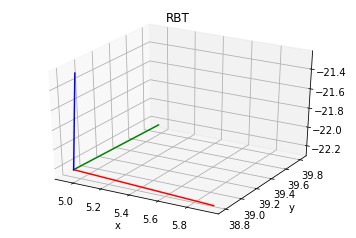

In [37]:
xi = np.random.randn(6)
xi[:3] = xi[:3]*10
xi[3:] = xi[3:]*100
print(xi)
T = mrob.geometry.SE3(xi)
print(T.T())
ax = plotConfig()
plotT(T, ax)
plt.title('RBT')
plt.show()

In [38]:
print(T.Ln())

[ 5.01661047e-03  4.91524242e-02 -2.90673552e-02  4.92314937e+00
  3.88296690e+01 -2.22139523e+01]


## Create rotation + translation vector
$$\begin{equation*}
\xi = 
\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\theta_3 \\
\rho_1 \\
\rho_2 \\
\rho_3
\end{bmatrix}
\end{equation*}$$

In [39]:
help(mrob.geometry.SE3)

Help on class SE3 in module mrob.geometry:

class SE3(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      SE3
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Ln(...)
 |      Ln(self: mrob.geometry.SE3) -> numpy.ndarray[numpy.float64[6, 1]]
 |      
 |      Logarithm + vee operator, returns 6D coordinates of the tangent space around the identity
 |  
 |  R(...)
 |      R(self: mrob.geometry.SE3) -> numpy.ndarray[numpy.float64[3, 3]]
 |      
 |      Outputs the Rotation array 3x3 component of the RBT
 |  
 |  T(...)
 |      T(self: mrob.geometry.SE3) -> numpy.ndarray[numpy.float64[4, 4], flags.c_contiguous]
 |      
 |      Outputs a 4x4 array with the RBT
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: mrob.geometry.SE3) -> None
 |      
 |      The Default constructor creates the identity transformation
 |      
 |      2. __init__(self

### Create RBT matrix, i.e. this mapping:
$$\Large \rm I\!R^6 \rightarrow \rm SE(3)$$
### Inside the .SE3() method, this formula is applied:
$$\Large T = Exp(\xi)$$

In [44]:
xi = np.random.randn(6)
print('xi 1 = ', xi)
T1 = mrob.geometry.SE3(xi)
print(T1.T())
xi = np.random.randn(6)
print('xi 2 = ', xi)
T2 = mrob.geometry.SE3(xi)
print(T2.T())
print(T2.distance_trans(T1))

xi 1 =  [ 0.52371539  2.08984939  1.09585778 -1.13121727 -0.05120269 -1.50810747]
[[-0.66677492  0.02715993  0.74476408 -1.38978069]
 [ 0.6280626   0.55843552  0.54192909 -0.75934454]
 [-0.40118396  0.8291032  -0.38940894 -0.03408092]
 [ 0.          0.          0.          1.        ]]
xi 2 =  [ 0.16237172  1.11146288 -0.90959833  1.6692853  -2.10001253  1.21274878]
[[ 0.13614286  0.69995642  0.70108925  0.83321934]
 [-0.54879629  0.64246027 -0.53485272 -2.68807884]
 [-0.82479558 -0.3119388   0.47159987  0.34492909]
 [ 0.          0.          0.          1.        ]]
2.967388367302435


## Distance between RBT
$\Delta T = T_1*T_2^{-1}$